# 월 별 교통사고 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False #한글 폰트

df = pd.read_csv('도로교통공단_월별 교통사고 통계.csv', encoding='cp949')#데이터불러오기
#교통 사고가 특정 달에 많이 발생하는지 확인 및 이유 추측

In [2]:
df.head()

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,14480,190,3748,15789,1289
1,2,13284,181,3568,14263,1210
2,3,16000,187,4049,17062,1347
3,4,16336,182,4406,17537,1606
4,5,17552,203,4708,18851,1781


In [3]:
df.tail()

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
7,8,17212,246,4622,18539,1752
8,9,17860,239,4840,18955,1856
9,10,17333,265,5000,17992,1661
10,11,17748,257,4849,18748,1701
11,12,17197,194,4408,18426,1646


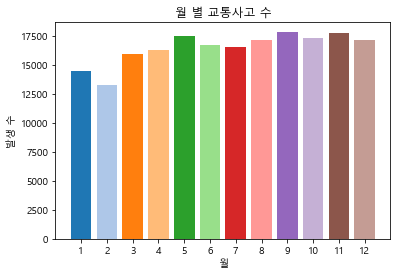

In [4]:
data = pd.DataFrame(df)

plt.bar(data['발생월'], data['사고건수'], color=plt.cm.tab20.colors)#사고 건수 막대 그래프
plt.title("월 별 교통사고 수")
plt.xlabel('월')
plt.ylabel('발생 수')
plt.xticks(ticks=df['발생월'])
plt.show()

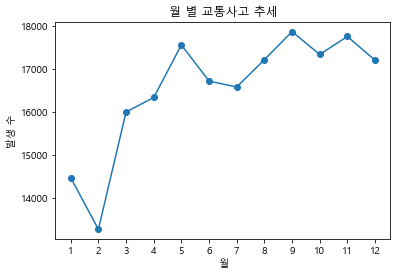

In [5]:
plt.plot(data['발생월'], data['사고건수'], marker='o')
plt.title('월 별 교통사고 추세')
plt.xlabel('월')
plt.ylabel('발생 수')
plt.xticks(ticks=data['발생월'])
plt.show()
#1,2월에는 적다가 점차 증가되는 것을 볼 수 있음

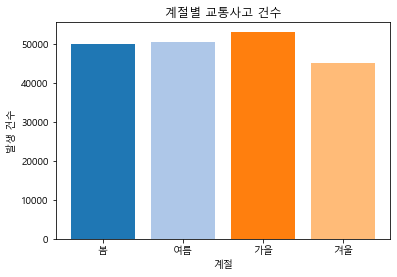

In [6]:
data['발생월'] = data['발생월'].replace({1: 13, 2:14})#오름차순으로 하기 위한 변형

month=[3, 6, 9, 12, 15]#bins를 사용하기 위한 범위 설정
season=['봄', '여름', '가을', '겨울']

data['계절'] = pd.cut(data['발생월'], bins=month, labels=season, right=False)
data['발생월'] = data['발생월'].replace({13:1, 14: 2})#설정 후 복구
season_data = data.groupby('계절')['사고건수'].sum().reset_index()

plt.bar(season_data['계절'], season_data['사고건수'], color = plt.cm.tab20.colors)
plt.title('계절별 교통사고 건수')
plt.xlabel('계절')
plt.ylabel('발생 건수')
plt.show()
#가을이 많은 것을 볼 수 있음

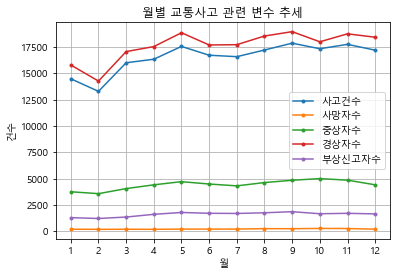

In [13]:
plt.plot(data["발생월"], data["사고건수"], marker='.', linestyle='-', label='사고건수')
plt.plot(data["발생월"], data["사망자수"], marker='.', linestyle='-', label='사망자수')
plt.plot(data["발생월"], data["중상자수"], marker='.', linestyle='-', label='중상자수')
plt.plot(data["발생월"], data["경상자수"], marker='.', linestyle='-', label='경상자수')
plt.plot(data["발생월"], data["부상신고자수"], marker='.', linestyle='-', label='부상신고자수')
plt.title('월별 교통사고 관련 부상자 추세')
plt.xlabel('월')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.xticks(ticks=data['발생월'])
plt.show()
#부상자 추세 그래프